In [1]:
import pandas as pd
import numpy as np

iowa_df = pd.read_csv("3-Year_Recidivism_for_Offenders_Released_from_Prison_in_Iowa.csv")
list1 = ['Race - Ethnicity', 'Age At Release ', 'Sex', 'Offense Classification', 'Offense Type', 'Return to Prison']

In [14]:
# compas_df = pd.read_csv("compas-scores-raw.csv")
# compas_df

In [3]:
compas_par_df = pd.read_csv("cox-violent-parsed.csv")
compas_par_df

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event
0,1.0,miguel hernandez,miguel,hernandez,14/08/2013,Male,18/04/1947,69,Greater than 45,Other,...,Risk of Violence,1,Low,14/08/2013,07/07/2014,14/07/2014,0,0,327,0
1,2.0,miguel hernandez,miguel,hernandez,14/08/2013,Male,18/04/1947,69,Greater than 45,Other,...,Risk of Violence,1,Low,14/08/2013,07/07/2014,14/07/2014,0,334,961,0
2,3.0,michael ryan,michael,ryan,31/12/2014,Male,06/02/1985,31,25 - 45,Caucasian,...,Risk of Violence,2,Low,31/12/2014,30/12/2014,03/01/2015,0,3,457,0
3,4.0,kevon dixon,kevon,dixon,27/01/2013,Male,22/01/1982,34,25 - 45,African-American,...,Risk of Violence,1,Low,27/01/2013,26/01/2013,05/02/2013,0,9,159,1
4,5.0,ed philo,ed,philo,14/04/2013,Male,14/05/1991,24,Less than 25,African-American,...,Risk of Violence,3,Low,14/04/2013,16/06/2013,16/06/2013,4,0,63,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18311,NaN,alexsandra beauchamps,alexsandra,beauchamps,29/12/2014,Female,21/12/1984,31,25 - 45,African-American,...,Risk of Violence,4,Low,29/12/2014,28/12/2014,07/01/2015,5,9,459,0
18312,NaN,winston gregory,winston,gregory,14/01/2014,Male,01/10/1958,57,Greater than 45,Other,...,Risk of Violence,1,Low,14/01/2014,13/01/2014,14/01/2014,0,0,808,0
18313,NaN,farrah jean,farrah,jean,09/03/2014,Female,17/11/1982,33,25 - 45,African-American,...,Risk of Violence,2,Low,09/03/2014,08/03/2014,09/03/2014,3,0,754,0
18314,NaN,florencia sanmartin,florencia,sanmartin,30/06/2014,Female,18/12/1992,23,Less than 25,Hispanic,...,Risk of Violence,4,Low,30/06/2014,15/03/2015,15/03/2015,2,0,258,0


In [64]:
test_df = iowa_df[list1]


race={'Black - Non-Hispanic':1,
      'White - Non-Hispanic':2,
      'American Indian or Alaska Native - Non-Hispanic':3,
      'White - Hispanic':4,
      'American Indian or Alaska Native - Hispanic':5,
      'Asian or Pacific Islander - Non-Hispanic':6,
      'White -':7,
      'Black - Hispanic':8,
      'Black -':9,
      'Asian or Pacific Islander - Hispanic':10,
      'N/A -':0,
      np.nan:0
     }
age={'Under 25':1,
     '25-34':2, 
     '35-44':3, 
     '45-54':4,  
     '55 and Older':5, 
     np.nan:0
    }
sex={'Male':1, 
     'Female':2,
     np.nan:0
    }
offenseC={'A Felony':1,
         'B Felony':2,
         'C Felony':3,
         'D Felony':4,
         'Other Felony':5,
         'Felony - Enhanced':6,
         'Other Felony (Old Code)':7,
         'Felony - Mandatory Minimum':8,
         'Felony - Enhancement to Original Penalty':9,
         'Simple Misdemeanor':10,
         'Aggravated Misdemeanor':11,
         'Serious Misdemeanor':12,
         'Sexual Predator Community Supervision':13,
         'Other Misdemeanor':14,
         'Special Sentence 2005':15
        }
offenceT={'Violent':1, 
          'Property':2, 
          'Public Order':3,
          'Drug':4, 
          'Other':0}
recidivism={'Yes':1,
            'No':0}
test_df.columns=['Race','Age','Sex','Classification','Type','Recidivism']
test_df.Race = [race[item] for item in test_df.Race] 
test_df.Age = [age[item] for item in test_df.Age]
test_df.Sex = [sex[item] for item in test_df.Sex] 
test_df.Classification = [offenseC[item] for item in test_df.Classification] 
test_df.Type = [offenceT[item] for item in test_df.Type] 
test_df.Recidivism = [recidivism[item] for item in test_df.Recidivism] 

test_df

,Race,Age,Sex,Classification,Type,Recidivism
0,1,2,1,3,1,1
1,2,2,1,4,2,1
2,2,3,1,2,4,1
3,2,2,1,2,0,0
4,1,3,1,4,1,1
...,...,...,...,...,...,...
26015,4,1,1,3,1,0
26016,2,3,1,3,1,0
26017,2,2,2,11,3,0
26018,2,2,1,4,2,0


In [61]:
X= test_df.values[:, 0:5]
print(str(X.shape))

(26020, 5)


In [62]:
Y= test_df.values[:,5:]
print(str(Y.shape))

(26020, 1)


In [63]:
x_train = X[0:15000]
print(x_train.shape)
x_test = X[15000:]

print(x_test.shape)
y_tr = Y[0:15000]
y_te = Y[15000:]


(15000, 5)
(11020, 5)


In [89]:
from sklearn import linear_model
reg = linear_model.LinearRegression().fit(x_train,y_tr) #needs to be a classification model instead

y_hat_score = reg.predict(x_test)
y_te.sort()
for i in range(len(y_hat_score)):
    print(y_hat_score[i],y_te[i])
    
y_hat_score.sort()
print(y_hat_score)

[0.26107258] [0]
[0.30872671] [1]
[0.32392748] [1]
[0.2616941] [0]
[0.28076575] [0]
[0.28076575] [0]
[0.28076575] [0]
[0.28076575] [0]
[0.28076575] [0]
[0.23840382] [0]
[0.23840382] [0]
[0.23840382] [0]
[0.23840382] [0]
[0.31298083] [1]
[0.31001674] [0]
[0.31001674] [0]
[0.30872671] [1]
[0.20797229] [0]
[0.28613493] [1]
[0.36789468] [0]
[0.36789468] [0]
[0.22113388] [0]
[0.29178936] [0]
[0.31313846] [1]
[0.39732144] [1]
[0.16783637] [0]
[0.16783637] [0]
[0.27643097] [1]
[0.32795598] [1]
[0.31850764] [0]
[0.30872671] [1]
[0.30480518] [0]
[0.30480518] [0]
[0.30480518] [0]
[0.30480518] [0]
[0.30480518] [0]
[0.40253299] [1]
[0.25404746] [0]
[0.25404746] [0]
[0.35253629] [0]
[0.35253629] [0]
[0.35253629] [0]
[0.35253629] [0]
[0.35253629] [0]
[0.35253629] [0]
[0.35253629] [0]
[0.28242168] [1]
[0.40269062] [0]
[0.40269062] [0]
[0.40269062] [0]
[0.40253299] [1]
[0.32016357] [0]
[0.21917456] [0]
[0.35253629] [0]
[0.35253629] [0]
[0.35253629] [0]
[0.4080598] [1]
[0.27764402] [0]
[0.33794519] [0]

[0.35253629] [0]
[0.20193381] [1]
[0.33102956] [0]
[0.41009898] [0]
[0.37476217] [1]
[0.27077654] [1]
[0.33552197] [0]
[0.35253629] [0]
[0.35253629] [0]
[0.35253629] [0]
[0.35253629] [0]
[0.35253629] [0]
[0.27077654] [0]
[0.27077654] [0]
[0.27077654] [0]
[0.27077654] [0]
[0.27077654] [0]
[0.27077654] [0]
[0.29178936] [1]
[0.34073352] [1]
[0.34551117] [0]
[0.34551117] [0]
[0.34551117] [0]
[0.34551117] [0]
[0.34551117] [0]
[0.34551117] [0]
[0.34551117] [0]
[0.34551117] [0]
[0.34551117] [0]
[0.34551117] [0]
[0.34551117] [0]
[0.34551117] [0]
[0.34551117] [0]
[0.35253629] [1]
[0.3371779] [1]
[0.31313846] [1]
[0.36789468] [0]
[0.30292283] [1]
[0.24225656] [0]
[0.3371779] [1]
[0.28613493] [0]
[0.28613493] [0]
[0.28613493] [0]
[0.28613493] [0]
[0.28613493] [0]
[0.28613493] [0]
[0.28613493] [0]
[0.28613493] [0]
[0.28613493] [0]
[0.16246719] [0]
[0.16395443] [0]
[0.37310624] [1]
[0.29344529] [0]
[0.35253629] [1]
[0.30480518] [1]
[0.25154727] [1]
[0.26706329] [1]
[0.32703106] [1]
[0.41492729] [1]

[0.28590851] [1]
[0.3162927] [1]
[0.24633571] [0]
[0.28613493] [1]
[0.20768704] [0]
[0.34716711] [0]
[0.34716711] [0]
[0.34716711] [0]
[0.32016357] [1]
[0.34238945] [1]
[0.22932139] [0]
[0.34716711] [0]
[0.34716711] [0]
[0.28022487] [0]
[0.38325307] [0]
[0.38325307] [0]
[0.27539656] [0]
[0.27539656] [0]
[0.27539656] [0]
[0.27539656] [0]
[0.27539656] [0]
[0.27539656] [0]
[0.27539656] [0]
[0.27539656] [0]
[0.27539656] [0]
[0.27539656] [0]
[0.27539656] [0]
[0.27539656] [0]
[0.27539656] [0]
[0.29589772] [0]
[0.34238945] [0]
[0.28590851] [0]
[0.27055012] [1]
[0.35088036] [0]
[0.21630557] [0]
[0.35253629] [0]
[0.35253629] [0]
[0.35253629] [0]
[0.35253629] [0]
[0.30245075] [1]
[0.25404746] [0]
[0.41327136] [1]
[0.25353579] [0]
[0.22093666] [1]
[0.26706329] [0]
[0.26706329] [0]
[0.26706329] [0]
[0.25541814] [0]
[0.25541814] [0]
[0.21168554] [0]
[0.26161345] [1]
[0.31071524] [1]
[0.31758272] [0]
[0.33960112] [1]
[0.31313846] [1]
[0.3449703] [1]
[0.31479439] [0]
[0.28779086] [0]
[0.27764402] [1]

[0.28756444] [0]
[0.28756444] [0]
[0.36719618] [1]
[0.36554025] [0]
[0.28779086] [1]
[0.28391998] [1]
[0.32537513] [1]
[0.34551117] [1]
[0.27454862] [0]
[0.26228563] [0]
[0.39270141] [0]
[0.24398128] [0]
[0.29589772] [0]
[0.34551117] [1]
[0.39012056] [1]
[0.28779086] [1]
[0.28779086] [1]
[0.32016357] [0]
[0.32016357] [0]
[0.299436] [0]
[0.299436] [0]
[0.44564407] [0]
[0.25154727] [1]
[0.32795598] [0]
[0.32795598] [1]
[0.31401524] [0]
[0.22932139] [0]
[0.22932139] [0]
[0.31828122] [1]
[0.39383381] [0]
[0.21208065] [0]
[0.31850764] [1]
[0.35253629] [1]
[0.32424273] [1]
[0.3371779] [1]
[0.40253299] [1]
[0.28779086] [0]
[0.36719618] [1]
[0.31313846] [1]
[0.276354] [1]
[0.34109943] [0]
[0.34109943] [0]
[0.263525] [0]
[0.263525] [0]
[0.37197384] [0]
[0.34551117] [1]
[0.3162927] [1]
[0.30299163] [0]
[0.31313846] [1]
[0.276354] [1]
[0.26228563] [1]
[0.24034501] [1]
[0.2303558] [0]
[0.28807611] [0]
[0.33180872] [0]
[0.33180872] [0]
[0.31001674] [0]
[0.36032869] [1]
[0.30888434] [1]
[0.21525302]

[0.37016028] [0]
[0.30776928] [1]
[0.31313846] [1]
[0.33316754] [0]
[0.40253299] [1]
[0.26107258] [0]
[0.21917456] [0]
[0.21917456] [1]
[0.28642018] [0]
[0.32827043] [1]
[0.29912075] [1]
[0.26107258] [1]
[0.15797479] [0]
[0.32016357] [1]
[0.31850764] [0]
[0.31850764] [0]
[0.31850764] [0]
[0.31850764] [0]
[0.31850764] [0]
[0.32016357] [0]
[0.32016357] [0]
[0.32016357] [0]
[0.22869986] [0]
[0.28779086] [1]
[0.26628413] [1]
[0.31313846] [0]
[0.4080598] [0]
[0.25376221] [0]
[0.25376221] [0]
[0.25376221] [0]
[0.24785216] [0]
[0.31313846] [1]
[0.27077654] [0]
[0.36789468] [1]
[0.32795598] [0]
[0.30289363] [0]
[0.33882197] [1]
[0.34551117] [1]
[0.35088036] [1]
[0.3449703] [1]
[0.37788389] [0]
[0.37788389] [0]
[0.35253629] [1]
[0.33051789] [0]
[0.37310624] [0]
[0.32703106] [1]
[0.29178936] [0]
[0.32016357] [1]
[0.34551117] [1]
[0.31313846] [1]
[0.28613493] [0]
[0.28642018] [1]
[0.35088036] [1]
[0.34551117] [1]
[0.30480518] [1]
[0.38325307] [1]
[0.37310624] [0]
[0.37310624] [0]
[0.37310624] [0]

[0.35940378] [0]
[0.27055012] [1]
[0.31850764] [1]
[0.34014199] [1]
[0.39791296] [1]
[0.37197384] [1]
[0.20768704] [0]
[0.37310624] [0]
[0.37310624] [0]
[0.33794519] [1]
[0.34238945] [0]
[0.34551117] [1]
[0.30810519] [0]
[0.30810519] [0]
[0.36032869] [1]
[0.24398128] [0]
[0.24398128] [0]
[0.35253629] [1]
[0.31313846] [1]
[0.24005975] [0]
[0.24005975] [0]
[0.35088036] [0]
[0.35088036] [0]
[0.35088036] [0]
[0.35088036] [0]
[0.28613493] [0]
[0.28613493] [0]
[0.28613493] [0]
[0.25412812] [1]
[0.20443401] [0]
[0.29300242] [0]
[0.29300242] [0]
[0.34109943] [0]
[0.43028568] [0]
[0.27077654] [1]
[0.25004896] [0]
[0.25004896] [0]
[0.22304543] [0]
[0.20797229] [1]
[0.35088036] [0]
[0.35088036] [0]
[0.35088036] [0]
[0.35088036] [0]
[0.35088036] [0]
[0.35088036] [0]
[0.35088036] [0]
[0.35088036] [0]
[0.35088036] [0]
[0.35088036] [0]
[0.35088036] [0]
[0.35088036] [0]
[0.35088036] [0]
[0.35088036] [0]
[0.35088036] [0]
[0.35088036] [0]
[0.22578311] [0]
[0.22578311] [0]
[0.26107258] [0]
[0.26107258] [

[0.32016357] [1]
[0.22167475] [1]
[0.36789468] [1]
[0.31863527] [1]
[0.30020329] [0]
[0.24982254] [0]
[0.24982254] [0]
[0.24982254] [0]
[0.24982254] [0]
[0.28391998] [1]
[0.28060812] [1]
[0.26706329] [1]
[0.28590851] [0]
[0.33794519] [0]
[0.31313846] [0]
[0.31313846] [0]
[0.26889418] [0]
[0.26889418] [0]
[0.31850764] [1]
[0.24963572] [0]
[0.31850764] [0]
[0.31850764] [0]
[0.31850764] [0]
[0.34716711] [1]
[0.34073352] [1]
[0.32795598] [0]
[0.32795598] [0]
[0.32795598] [0]
[0.29406682] [0]
[0.21145912] [0]
[0.37310624] [0]
[0.3371779] [0]
[0.3371779] [0]
[0.3371779] [0]
[0.3371779] [0]
[0.29178936] [0]
[0.29178936] [0]
[0.263525] [1]
[0.299436] [0]
[0.31850764] [0]
[0.37788389] [0]
[0.37788389] [0]
[0.2606297] [1]
[0.30836081] [0]
[0.37310624] [0]
[0.34551117] [1]
[0.35253629] [0]
[0.2774176] [1]
[0.31313846] [1]
[0.22482899] [1]
[0.35088036] [0]
[0.37772626] [1]
[0.18507711] [0]
[0.18507711] [0]
[0.34852593] [0]
[0.29558326] [1]
[0.3404779] [0]
[0.32016357] [0]
[0.26228563] [1]
[0.37031

[0.31850764] [0]
[0.31850764] [0]
[0.32070445] [0]
[0.32070445] [0]
[0.35774784] [1]
[0.34331437] [0]
[0.34331437] [0]
[0.22869986] [0]
[0.33316754] [1]
[0.37734302] [0]
[0.19632715] [1]
[0.28613493] [0]
[0.3371779] [0]
[0.32016357] [1]
[0.32016357] [0]
[0.32016357] [0]
[0.32537513] [1]
[0.32514871] [1]
[0.26228563] [0]
[0.26228563] [0]
[0.33552197] [0]
[0.33552197] [0]
[0.33552197] [0]
[0.33316754] [0]
[0.34109943] [1]
[0.30314925] [1]
[0.299436] [0]
[0.31313846] [0]
[0.31313846] [0]
[0.31313846] [0]
[0.28866764] [0]
[0.33778756] [0]
[0.39791296] [0]
[0.33102956] [0]
[0.31479439] [1]
[0.26107258] [1]
[0.29109086] [1]
[0.30292283] [1]
[0.36198463] [0]
[0.36198463] [0]
[0.36198463] [0]
[0.38846463] [1]
[0.24248298] [0]
[0.31850764] [1]
[0.36789468] [0]
[0.28521001] [0]
[0.3162927] [1]
[0.31887355] [1]
[0.30722841] [0]
[0.35088036] [1]
[0.31313846] [0]
[0.31313846] [0]
[0.31313846] [0]
[0.31001674] [0]
[0.28242168] [0]
[0.22869986] [0]
[0.22869986] [0]
[0.16372801] [1]
[0.31567117] [0]
[

[0.32016357] [1]
[0.25404746] [1]
[0.37772626] [0]
[0.3162927] [1]
[0.28642018] [0]
[0.28642018] [0]
[0.20768704] [1]
[0.19632715] [0]
[0.33960112] [1]
[0.36789468] [0]
[0.36198463] [1]
[0.28613493] [0]
[0.34238945] [1]
[0.30880368] [0]
[0.29700092] [1]
[0.31313846] [1]
[0.37772626] [1]
[0.35088036] [0]
[0.34551117] [1]
[0.30292283] [1]
[0.3449703] [0]
[0.3449703] [0]
[0.31001674] [0]
[0.31001674] [0]
[0.31001674] [0]
[0.31001674] [0]
[0.31001674] [0]
[0.31001674] [0]
[0.31001674] [0]
[0.31001674] [0]
[0.31001674] [0]
[0.31001674] [0]
[0.31001674] [0]
[0.31001674] [0]
[0.31001674] [0]
[0.31001674] [0]
[0.31001674] [0]
[0.28756444] [1]
[0.26107258] [1]
[0.3703179] [1]
[0.31071524] [0]
[0.28613493] [0]
[0.25404746] [1]
[0.1904463] [0]
[0.22869986] [1]
[0.31298083] [1]
[0.13785768] [0]
[0.25154727] [1]
[0.26674804] [0]
[0.31298083] [1]
[0.31780914] [0]
[0.38255457] [0]
[0.38255457] [0]
[0.32290125] [0]
[0.34551117] [1]
[0.37476217] [1]
[0.28779086] [0]
[0.24813741] [0]
[0.28590851] [1]
[0

[0.28076575] [0]
[0.25154727] [0]
[0.30836081] [0]
[0.24527131] [0]
[0.25541814] [1]
[0.25541814] [0]
[0.25154727] [1]
[0.27764402] [0]
[0.25471965] [1]
[0.24302385] [1]
[0.28076575] [1]
[0.25154727] [1]
[0.25004896] [1]
[0.25154727] [0]
[0.28613493] [1]
[0.28022487] [0]
[0.25004896] [0]
[0.276354] [1]
[0.31780914] [0]
[0.20231786] [0]
[0.25064049] [0]
[0.25541814] [0]
[0.30836081] [1]
[0.25154727] [0]
[0.33853672] [0]
[0.22304543] [0]
[0.29300242] [0]
[0.27764402] [0]
[0.31372999] [1]
[0.28613493] [1]
[0.31094166] [1]
[0.3237192] [0]
[0.23840382] [0]
[0.27539656] [0]
[0.25541814] [1]
[0.25412812] [0]
[0.27539656] [0]
[0.24005975] [1]
[0.28613493] [1]
[0.21525302] [0]
[0.29300242] [1]
[0.23469057] [1]
[0.24005975] [0]
[0.25154727] [0]
[0.24648148] [0]
[0.22113388] [0]
[0.14730602] [1]
[0.16008356] [0]
[0.15321607] [0]
[0.23840382] [0]
[0.24785216] [0]
[0.22304543] [0]
[0.2606297] [0]
[0.25376221] [0]
[0.23840382] [1]
[0.28076575] [1]
[0.24527131] [1]
[0.25376221] [1]
[0.24527131] [1]
[

[0.31313846] [0]
[0.27764402] [1]
[0.28164253] [0]
[0.31298083] [1]
[0.28242168] [0]
[0.31001674] [0]
[0.31592679] [0]
[0.35018186] [0]
[0.28779086] [0]
[0.29187002] [1]
[0.25815582] [1]
[0.26706329] [1]
[0.30776928] [0]
[0.25707408] [1]
[0.22281901] [0]
[0.27243247] [0]
[0.28779086] [0]
[0.29187002] [0]
[0.23430653] [1]
[0.24762574] [0]
[0.26706329] [0]
[0.28242168] [0]
[0.31001674] [0]
[0.31313846] [0]
[0.31259759] [0]
[0.29465835] [0]
[0.31850764] [1]
[0.36554025] [0]
[0.25941665] [0]
[0.32537513] [0]
[0.31313846] [0]
[0.34331437] [0]
[0.2616941] [0]
[0.31001674] [0]
[0.27243247] [0]
[0.28779086] [0]
[0.28779086] [0]
[0.28779086] [1]
[0.27885419] [0]
[0.33794519] [0]
[0.28391998] [0]
[0.28355408] [0]
[0.31298083] [0]
[0.28391998] [0]
[0.28391998] [0]
[0.22167475] [0]
[0.28242168] [1]
[0.31850764] [1]
[0.28391998] [0]
[0.34331437] [0]
[0.27114244] [0]
[0.34331437] [1]
[0.31313846] [1]
[0.30872671] [0]
[0.31313846] [0]
[0.30314925] [1]
[0.25404746] [1]
[0.30722841] [1]
[0.28521001] [1

[0.32016357] [1]
[0.13923574] [0]
[0.28587931] [0]
[0.32514871] [0]
[0.40269062] [0]
[0.35661544] [0]
[0.3012669] [0]
[0.24405825] [0]
[0.34551117] [1]
[0.28076575] [1]
[0.3703179] [1]
[0.37476217] [1]
[0.233685] [0]
[0.32016357] [1]
[0.37476217] [0]
[0.37251471] [0]
[0.26107258] [0]
[0.29755365] [1]
[0.23626585] [1]
[0.37568709] [0]
[0.35088036] [0]
[0.32346358] [0]
[0.25350659] [1]
[0.37568709] [1]
[0.35774784] [1]
[0.299436] [0]
[0.343442] [0]
[0.34551117] [0]
[0.32424273] [1]
[0.33552197] [0]
[0.34551117] [1]
[0.24005975] [0]
[0.299436] [1]
[0.31479439] [1]
[0.32424273] [1]
[0.30480518] [0]
[0.31313846] [1]
[0.40328215] [0]
[0.34551117] [0]
[0.38867291] [1]
[0.33180872] [1]
[0.34551117] [1]
[0.37568709] [1]
[0.41492729] [1]
[0.28022487] [0]
[0.3449703] [0]
[0.32424273] [0]
[0.33482347] [0]
[0.37734302] [1]
[0.32016357] [0]
[0.32016357] [1]
[0.34551117] [1]
[0.28626255] [0]
[0.29755365] [0]
[0.38867291] [1]
[0.39548974] [0]
[0.28779086] [0]
[0.31401524] [1]
[0.32016357] [1]
[0.29344

[0.29109086] [0]
[0.233685] [0]
[0.28642018] [1]
[0.34238945] [0]
[0.32961191] [0]
[0.31879289] [1]
[0.37310624] [0]
[0.33363961] [0]
[0.36494872] [0]
[0.34238945] [1]
[0.34551117] [1]
[0.26336738] [0]
[0.33102956] [0]
[0.37197384] [0]
[0.36789468] [0]
[0.28164253] [0]
[0.37568709] [0]
[0.32016357] [1]
[0.33552197] [0]
[0.37788389] [1]
[0.28242168] [0]
[0.37197384] [1]
[0.33794519] [1]
[0.36386618] [0]
[0.33960112] [0]
[0.30480518] [1]
[0.34551117] [1]
[0.26518093] [0]
[0.32016357] [0]
[0.39270141] [0]
[0.32424273] [0]
[0.37568709] [0]
[0.34551117] [1]
[0.2303558] [0]
[0.32514871] [0]
[0.30480518] [0]
[0.34716711] [1]
[0.33552197] [0]
[0.263525] [0]
[0.35253629] [1]
[0.4080598] [0]
[0.22780415] [1]
[0.41492729] [0]
[0.21855303] [0]
[0.32016357] [0]
[0.24034501] [1]
[0.34331437] [0]
[0.28642018] [0]
[0.299436] [1]
[0.30480518] [0]
[0.33294112] [0]
[0.34551117] [0]
[0.3995689] [0]
[0.31645032] [1]
[0.2616941] [0]
[0.27243247] [0]
[0.28756444] [1]
[0.299436] [0]
[0.34238945] [0]
[0.367196

[0.31479439] [1]
[0.32424273] [1]
[0.31479439] [1]
[0.27243247] [0]
[0.27077654] [0]
[0.34662623] [0]
[0.32703106] [0]
[0.1713232] [1]
[0.38421051] [0]
[0.35774784] [0]
[0.26863856] [1]
[0.32016357] [1]
[0.26486648] [0]
[0.36032869] [0]
[0.4080598] [1]
[0.37788389] [0]
[0.35253629] [1]
[0.28391998] [0]
[0.37197384] [0]
[0.35774784] [0]
[0.31479439] [0]
[0.38325307] [0]
[0.4080598] [0]
[0.35124626] [1]
[0.35661544] [0]
[0.32016357] [1]
[0.29865685] [1]
[0.35088036] [1]
[0.3703179] [1]
[0.24633571] [0]
[0.39012056] [0]
[0.31479439] [0]
[0.37476217] [0]
[0.43028568] [1]
[0.3703179] [1]
[0.22304543] [0]
[0.32346358] [0]
[0.38255457] [0]
[0.3162927] [0]
[0.32772956] [0]
[0.27055012] [1]
[0.29535685] [1]
[0.34716711] [1]
[0.33552197] [0]
[0.34716711] [1]
[0.39012056] [0]
[0.34014199] [0]
[0.31259759] [0]
[0.31001674] [0]
[0.2572017] [0]
[0.35253629] [1]
[0.32016357] [1]
[0.32016357] [1]
[0.22281901] [0]
[0.24982254] [0]
[0.32795598] [0]
[0.3703179] [0]
[0.35253629] [0]
[0.32016357] [1]
[0.33

[0.35253629] [1]
[0.32703106] [1]
[0.32016357] [0]
[0.36719618] [1]
[0.27077654] [0]
[0.3703179] [1]
[0.30245075] [0]
[0.35088036] [0]
[0.35088036] [1]
[0.29300242] [0]
[0.32703106] [1]
[0.31567117] [1]
[0.17559958] [0]
[0.36032869] [1]
[0.33552197] [0]
[0.35253629] [0]
[0.30480518] [1]
[0.34551117] [0]
[0.35253629] [0]
[0.34551117] [1]
[0.35253629] [1]
[0.31259759] [0]
[0.29865685] [0]
[0.33960112] [0]
[0.30836081] [1]
[0.36198463] [0]
[0.292776] [0]
[0.33853672] [0]
[0.32016357] [0]
[0.32016357] [0]
[0.35088036] [0]
[0.35253629] [0]
[0.21744983] [0]
[0.32016357] [0]
[0.24005975] [0]
[0.3371779] [0]
[0.31479439] [0]
[0.36719618] [0]
[0.34551117] [1]
[0.32537513] [0]
[0.28642018] [1]
[0.281051] [1]
[0.37772626] [1]
[0.25404746] [0]
[0.299436] [0]
[0.30314925] [0]
[0.25941665] [1]
[0.3162927] [1]
[0.3703179] [0]
[0.3449703] [0]
[0.30480518] [0]
[0.35088036] [1]
[0.28355408] [0]
[0.33552197] [0]
[0.29344529] [0]
[0.35774784] [1]
[0.32016357] [1]
[0.23469057] [1]
[0.39012056] [1]
[0.34551

In [81]:
list2 = ['sex', 'age', 'race', 'priors_count', 'is_recid', 'r_charge_desc', 'is_violent_recid']
test2_df = compas_par_df[list2]


In [87]:
# test2_df
one = test2_df[test2_df['race']=="African-American"]
one
print(one['is_violent_recid'])

3        1
4        0
5        0
6        0
7        0
        ..
18308    0
18309    0
18310    0
18311    0
18313    0
Name: is_violent_recid, Length: 9791, dtype: int64


In [ ]:
#check accuracy vs percision
# look at fairness in the algorithm compared to the compas data

In [110]:
def threshold_predictions(y_hat_score, threshold):
    # YOUR CODE HERE
    output_list = []
    for i in range(len(y_hat_score)):
        if y_hat_score[i] <= threshold:
            output_list.append(0)
        else:
            output_list.append(1)
    return output_list

y_hat_new = threshold_predictions(y_hat_score, 0.24)

In [91]:
def true_positive_rate(y, y_hat):
    tn = tp = fn = fp = 0
    for i in range(len(y_hat)):
        if(y[i] == 0 and y_hat[i] == 0):
            tn+=1
        elif(y[i] == 1 and y_hat[i] == 1):
            tp+=1
        elif(y[i] == 0 and y_hat[i] == 1):
            fp+=1
        else:
            fn+=1
    return tp/(tp+fn)

def false_positive_rate(y, y_hat):
    tn = tp = fn = fp = 0
    for i in range(len(y_hat)):
        if(y[i] == 0 and y_hat[i] == 0):
            tn+=1
        elif(y[i] == 1 and y_hat[i] == 1):
            tp+=1
        elif(y[i] == 0 and y_hat[i] == 1):
            fp+=1
        else:
            fn+=1
    return fp/(fp+tn)

def accuracy_rate(y, y_hat):
    tn = tp = fn = fp = 0
    for i in range(len(y_hat)):
        if(y[i] == 0 and y_hat[i] == 0):
            tn+=1
        elif(y[i] == 1 and y_hat[i] == 1):
            tp+=1
        elif(y[i] == 0 and y_hat[i] == 1):
            fp+=1
        else:
            fn+=1
    return tp+tn/(fp+tn+fn+tp)

In [111]:
print(true_positive_rate(Y, y_hat_new))
print(false_positive_rate(Y, y_hat_new))

0.9064467766116941
0.9089134677944047


In [112]:
def compute_roc_curve(y, y_hat_score, num_thresholds):
    # Your code here
    thresh = 0.00
    #increment = 1/num_thresholds
    tpr_res = []
    fpr_res = []
    for i in range(num_thresholds):
        new_t = threshold_predictions(y_hat_score, thresh)
        tpr_res.append(true_positive_rate(y,new_t))
        fpr_res.append(false_positive_rate(y,new_t))
        thresh += 1/num_thresholds

    return tpr_res, fpr_res

In [114]:
tpr, fpr = compute_roc_curve(Y, y_hat_score, 50)

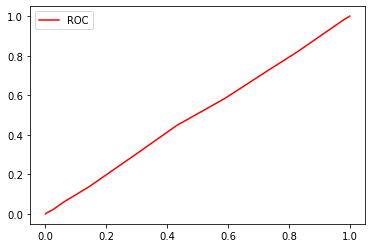

In [115]:
%matplotlib inline 
import matplotlib.pyplot as plt

plt.plot(fpr,tpr, label = "ROC", c='r')
plt.legend()
plt.show()

#from this we can see that the model has a hard time of determining whether or not a person will reoffend
#the compas data shows that a model like this one can still be more fair, but it will be less accurate?